# 01wk-2: 라인플랏, 산점도, 객체지향적 시각화 – draft

최규빈  
2023-09-06

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/01wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상

In [1]:
# {{<video  >}}

# imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (3, 2) 
matplotlib.rcParams['figure.dpi'] = 150

# Line plot

## 기본플랏

## 모양변경

## 색상변경

`-` 예시1

`-` 예시2

## 모양 + 색상변경

`-` 예시1

`-` 예시2: 순서변경 가능

## 원리?

`-` `r--`등의 옵션은 Markers + Line Styles + Colors 의 조합으로 표현가능

ref:
<https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html>

-   `--r`: 점선(dashed)스타일 + 빨간색
-   `r--`: 빨간색 + 점선(dashed)스타일
-   `:k`: 점선(dotted)스타일 + 검은색
-   `k:`: 검은색 + 점선(dotted)스타일

`-` 우선 Marker를 무시하면 Line Styles + Color로 표현가능한 조합은
$4\times 8=32$ 개

## Line Styles

| character |     description     |
|:---------:|:-------------------:|
|    ‘-’    |  solid line style   |
|    ‘–’    |  dashed line style  |
|   ‘-.’    | dash-dot line style |
|    ‘:’    |  dotted line style  |

## Colors

| character |  color  |
|:---------:|:-------:|
|    ‘b’    |  blue   |
|    ‘g’    |  green  |
|    ‘r’    |   red   |
|    ‘c’    |  cyan   |
|    ‘m’    | magenta |
|    ‘y’    | yellow  |
|    ‘k’    |  black  |
|    ‘w’    |  white  |

## Markers

| character |      description      |
|:---------:|:---------------------:|
|    ‘.’    |     point marker      |
|    ‘,’    |     pixel marker      |
|    ‘o’    |     circle marker     |
|    ‘v’    | triangle_down marker  |
|    ‘^’    |  triangle_up marker   |
|   ‘\<’    | triangle_left marker  |
|   ‘\>’    | triangle_right marker |
|    ‘1’    |    tri_down marker    |
|    ‘2’    |     tri_up marker     |
|    ‘3’    |    tri_left marker    |
|    ‘4’    |   tri_right marker    |
|    ‘8’    |    octagon marker     |
|    ‘s’    |     square marker     |
|    ‘p’    |    pentagon marker    |
|    ‘P’    | plus (filled) marker  |
|   ’\*’    |      star marker      |
|    ‘h’    |    hexagon1 marker    |
|    ‘H’    |    hexagon2 marker    |
|    ‘+’    |      plus marker      |
|    ‘x’    |       x marker        |
|    ‘X’    |   x (filled) marker   |
|    ‘D’    |    diamond marker     |
|    ‘d’    |  thin_diamond marker  |
|   ‘\|’    |     vline marker      |
|   ’\_’    |     hline marker      |

`-` 예시1

`-` 예시2

`-` 예시3: line style + color 조합으로 사용하든 color + line style
조합으로 사용하든 상관없음

`-` 예시4: line style을 중복으로 사용하거나 color를 중복으로 쓸 수 는
없다.

`-` 예시5: 색이 사실 8개만 있는건 아니다.

ref: <https://matplotlib.org/2.0.2/examples/color/named_colors.html>

`-` 예시6: 색을 바꾸려면 hex코드를 넣는 방법이 젤 깔끔함

ref: <https://htmlcolorcodes.com/>

`-` 예시7: 당연히 라인스타일도 4개만 있진 않음

ref:
<https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html>

# Scatter plot

## 원리

`-` 그냥 마커를 설정하면 끝!

## 마커변경

`-` 예시1

`-` 예시2

## 색깔변경

`-` 예시1

`-` 예시2

`-` 예시3

## dot-connected plot

`-` 예시1: 마커와 라인스타일을 동시에 사용하면 dot-connected plot이
된다.

`-` 예시2: 당연히 색도 적용가능함

`-` 예시3: 서로 순서를 바꿔도 상관없다.

# 겹쳐 그리기

`-` 예시1

`-` 예시2

`-` 예시3

------------------------------------------------------------------------

`-` summary: boxplot, histogram, lineplot, scatterplot

-   라인플랏: 추세
-   스캐터플랏: 두 변수의 관계
-   박스플랏: 분포(일상용어)의 비교, 이상치
-   히스토그램: 분포(통계용어)파악
-   바플랏: 크기비교

------------------------------------------------------------------------

# 객체지향적 시각화

## 예비학습

`# 예비학습1` – 그림을 저장했다가 꺼내보고 싶다.

`-` 그림을 그리고 저장하자.

`-` 다른그림을 그려보자.

`-` 저장한 그림은 언제든지 꺼내볼 수 있음

`#`

`# 예비학습2` – fig 는 뭐야?

-   `Figure`라는 클래스에서 찍힌 인스턴스

`-` 여러가지 값, 기능이 저장되어 있겠음.

`-` 계층구조: Figure $\supset$ \[Axes,…\], … $\supset$ YAxis, XAxis,
\[Line2D,…\], …

**1. `.axes` 로 Axes 를 끄집어냄**

**2. `.xaxis`, `.yaxis` 로 Axis 를 끄집어냄**

**3. `.get_lines()`로 Line2D를 끄집어냄**

`-` 오브젝트내용 확인 (그닥 필요 없음)

`-` matplotlib의 설명

ref:
<https://matplotlib.org/stable/gallery/showcase/anatomy.html#sphx-glr-gallery-showcase-anatomy-py>

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

## 목표

`-` 아래와 똑같은 그림을 `plt.plot()`을 쓰지 않고 만든다.

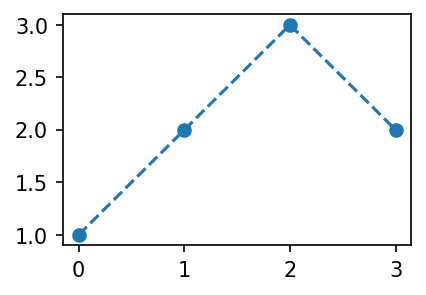

In [69]:
plt.plot([1,2,3,2],'--o')

## Figure $\to$ Axes $\to$ Lines2D

## 쉬운코드들

`-` Line2d 오브젝트를 쓰지 않는 방법: `ax.plot()` 이용!!

`-` add_axes()를 쓰지 않는 방법: `fig.subplots()` 이용!!

`-` 더 생략하는 방법: `plt.subplots()` – 코드 뜯어볼 것

## 정리 ($\star\star\star$)

`-` 결국 아래는 모두 같은 코드이다.

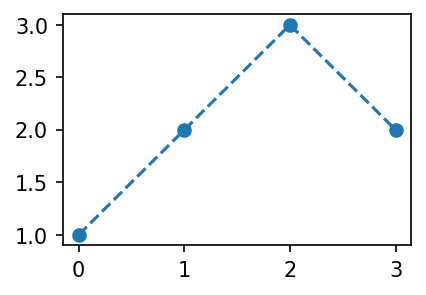

In [67]:
## 코드1 
plt.plot([1,2,3,2],'--o')

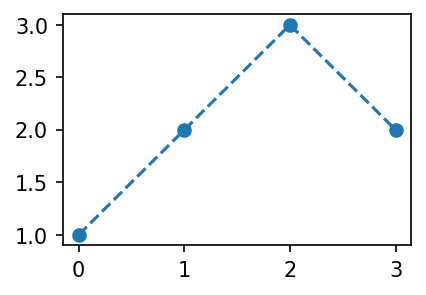

In [68]:
## 코드2
fig,ax = plt.subplots()
ax.plot([1,2,3,2],'--o')

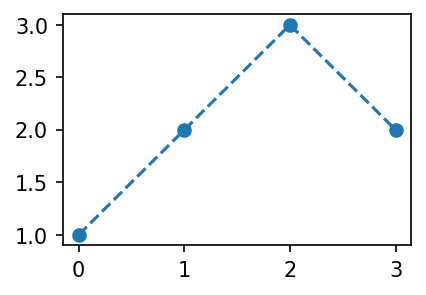

In [69]:
## 코드3
fig = plt.Figure()
ax = fig.subplots()
ax.plot([1,2,3,2],'--o')
fig

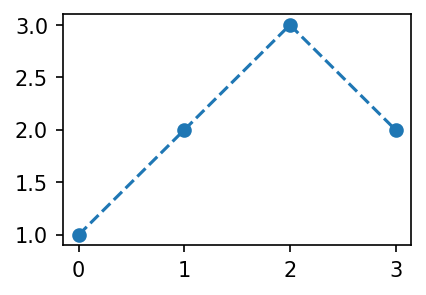

In [70]:
## 코드4
fig = plt.Figure()
ax = fig.add_axes([0.125, 0.11, 0.775, 0.77])
ax.plot([1,2,3,2],'--o')
fig

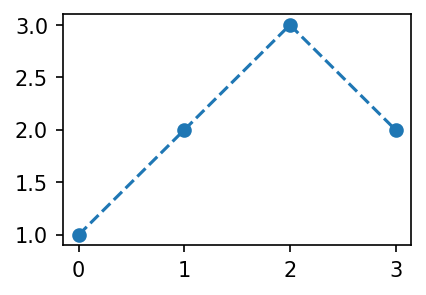

In [71]:
## 코드5
fig = plt.Figure()
ax = fig.add_axes([0.125, 0.11, 0.775, 0.77])
ax.set_xlim([-0.15, 3.15])
ax.set_ylim([0.9, 3.1])
line = matplotlib.lines.Line2D(
    xdata=[0,1,2,3], 
    ydata=[1,2,3,2], 
    linestyle='--', 
    marker='o'
)
ax.add_line(line)
fig

# 미니맵

`-` 틀잡기